In [1]:
import numpy as np
import copy

parameters:
- n_p - number of members of party in power
- n_o - number of members of party in opposition
- n is the total
- m number of bills

In [2]:
n_p=120;
n_o=100;
n=n_p+n_o;
m=400;
a=np.zeros([n,m]);

bills are of 4 types:
- nonpartisan assigned with prob pr_nonpart
- partisan, policy - only party in power wants them (pr_pol is the frewuency of those, among the partisan ones)
- partisan, operational, pr_opp: both parties 
- partisan, trolling, pr_troll: only opposition wants it

Each bill is described by two parameters; how likely will the party in power/opposition agree with the bill. Each member is described by a single parameter representing their alignment with the party in power/opposition.The probability that a member votes for a bill is a binomail rv; the success probability is the convex combination of the two parameters describing the bill mixed using the parameter describing the member.

In [30]:
def normal(pr_p, pr_o):
    pr_p = pr_p-0.5
    pr_o = pr_o-0.5
    l1 = abs(pr_p) + abs(pr_o)
    l1 = max(abs(pr_p), abs(pr_o))
    pr_p = pr_p/l1
    pr_o = pr_o/l1
    pr_p = 0.5+0.5*pr_p
    pr_o = 0.5+0.5*pr_o
    return pr_p, pr_o
 
def bill(pr_p,pr_o,b_p,b_o,mem, conc=0):
    # This line is used
    if conc == 1:
        pr_p, pr_o = normal(pr_p, pr_o)
    b=np.zeros([b_p+b_o]);
    for k in range(b_p):
        b[k]=2*int(np.random.binomial(1,mem[k]*pr_p+pr_o-mem[k]*pr_o))-1;
    for k in range(b_p, b_p+b_o):
        b[k]=2*int(np.random.binomial(1,mem[k]*pr_p+pr_o-mem[k]*pr_o))-1;
    return(b);

'''
def bill(pr_p,pr_o,b_p,b_o):
    b=np.zeros([b_p+b_o]);
    for k in range(b_p):
        b[k]=2*int(np.random.binomial(1,pr_p))-1;
    for k in range(b_p, b_p+b_o):
        b[k]=2*int(np.random.binomial(1,pr_o))-1;
    return(b);
'''
def bill_mem(bill, mem, conc=0):
    # This line is used
    if conc == 1:
        pr_p, pr_o = normal(pr_p, pr_o)
    b=np.zeros(len(mem));
    for k in range(len(mem)):
        b[k] = 2*int(np.random.binomial(1,(mem[k]*bill+1)/2.0))-1;
    return(b);


produce m bills, and do svd

220


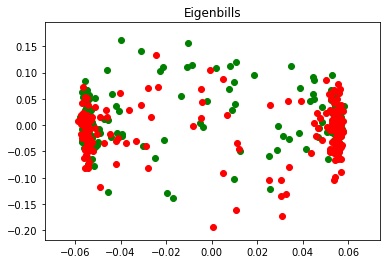

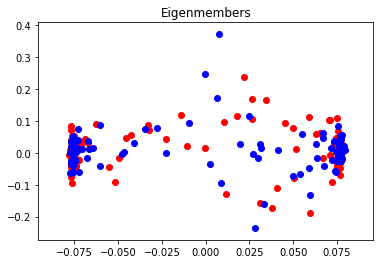

In [46]:
import math

def sigmoid(x, k=1):
  return -1.0 + 2*(1 / (1 + math.exp(-k*x)))

# The first few set of members leans more toward the party in power
# while the next set lean toward oppn.
mem=np.zeros([n_p+n_o]);
for k in range(n_p):
    mem[k] = (0.8+1.2*np.random.rand(1))/2.0
    #mem[k]=1
    #mem[k] = np.random.rand(1)
for k in range(n_p, n_p+n_o):
    mem[k] = 1.2*np.random.rand(1)/2.0
    #mem[k]=0
    #mem[k] = np.random.rand(1)

# The bills are completely random in character
for l in range(m):
    pr_p = np.random.rand(1)
    pr_o = np.random.rand(1)
    #a[:,l]=bill(pr_p, pr_o, n_p, n_o, mem);

# There are fewer bills in the unpopular corner
l = 0
bill_params = []
'''
while 1:
    pr_p = np.random.rand(1)
    pr_o = np.random.rand(1)
    if np.random.binomial(1, (pr_p+pr_o)*(pr_p+pr_o)/8.0):
        a[:,l]=bill(pr_p, pr_o, n_p, n_o, mem, 1);
        bill_params.append([pr_p, pr_o])
        l = l+1
    if l == m:
        break    
'''

for k in range(n_p+n_o):
    mem[k] = sigmoid(2*np.random.rand(1)-1, 10)
for l in range(m):
    bill_p = sigmoid(2*np.random.rand(1)-1, 10)
    a[:,l]=bill_mem(bill_p, mem);

print(np.linalg.matrix_rank(a))
[u,s,v]=np.linalg.svd(a);
import matplotlib.pyplot as plt

passed_indices = []
failed_indices = []
for i in range(m):
    if sum(a[:,i]) >= 0:
        passed_indices.append(i)
    else:
        failed_indices.append(i)
plt.scatter(v[0,passed_indices], v[1,passed_indices], c='g')
plt.scatter(v[0,failed_indices], v[1,failed_indices], c='r')
plt.title('Eigenbills')
plt.show()
plt.scatter(u[:n_p,0], u[:n_p,1], c='r')
plt.scatter(u[n_p+1:,0], u[n_p+1:,1], c='b')
plt.title('Eigenmembers')
plt.show()

In [47]:
def std_vot_mat(a):
    a_sorted = np.copy(a)
    [u,s,v]=np.linalg.svd(a);
    a1 = 1;
    a2 = 0;
    b1 = 1;
    b2 = 0;
    mem_inds = sorted(range(u.shape[0]), key=lambda k: b1*u[k,0]+b2*u[k,1])
    bill_inds = sorted(range(v.shape[0]), key=lambda k: a1*v[0,k]+a2*v[1,k])
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            a_sorted[i,j] = a[mem_inds[i], bill_inds[j]]
    return a_sorted

a_sorted = std_vot_mat(a)

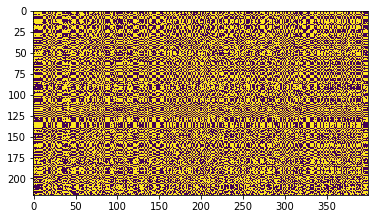

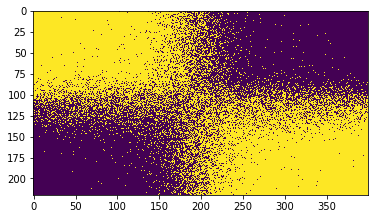

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(a)
plt.show()
plt.imshow(a_sorted)
plt.show()